In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.316200e+05,131615.000000,130575.000000,1.202630e+05,120459.000000,130575.000000,130946.000000,130941.000000,129906.000000,119602.000000,119798.000000,129906.000000,110160.000000,17100.000000,17100.000000,19542.000000,19542.000000,1328.000000,1328.000000,2211.000000,2211.000000,5.843000e+04,5.856300e+04,58563.000000,58430.000000,7.038800e+04,70388.000000,66282.000000,65621.000000,3.662400e+04,3.500100e+04,3.206900e+04,9.436000e+03,3.044700e+04,6.594400e+04,36624.000000,35001.000000,32069.000000,9436.000000,65944.000000,6.478200e+04,64782.000000,113262.000000,1.383910e+05,126163.000000,120118.000000,118792.000000,119463.000000,120925.000000,80759.000000,120334.000000,124384.000000,93693.000000,92341.000000,60563.000000,109292.000000,129582.000000,120425.000000,4881.000000,4881.000000,4881.000000,4881.000000
mean,2.195452e+06,8559.717327,8563.451307,5.334078e+04,182.695506,167.805190,21479.900731,91.349637,91.176799,429.714347,1.600165,1.467138,0.996305,884.629825,22.707559,4044.037202,159.907346,258.054970,17.888689,3324.824966,90.130810,5.910424e+04,1.310322e+07,555.894336,2.648964,5.540552e+04,2.525476,0.085503,159.648372,1.241523e+08,6.675527e+07,4.795486e+07,4.993640e+06,1.094904e+06,5.153673e+05,56.581346,32.001054,25.867136,3.746448,3403.821788,2.649842e+05,0.173905,55.853403,1.567819e+08,403.080867,30.489522,8.737629,5.526888,19235.419493,13.528716,260.144778,8.052904,10.586103,32.753211,50.837213,3.027838,73.262401,0.726014,34081.168408,9.300443,16.473342,846.448426
std,1.245719e+07,44551.382323,43912.561191,2.729904e+05,864.607480,811.783588,35283.598286,215.906718,182.502998,694.696572,4.133591,3.123640,0.340955,2772.435842,24.777449,11102.879508,213.465692,529.619868,32.834642,10473.294243,142.162288,1.987878e+05,5.314157e+07,1349.330571,7.233811,1.778533e+05,5.996355,0.095145,830.421133,5.751547e+08,3.145819e+08,2.384430e+08,2.075052e+07,4.172248e+06,2.809202e+06,53.263103,26.994487,25.016393,7.891943,4064.476544,2.430098e+06,0.275547,20.606194,7.268482e+08,1880.569911,9.113887,6.177989,4.212237,20092.755476,20.000184,119.893488,4.324941,10.500102,13.517675,31.817005,2.454095,7.529330,0.150013,95174.579608,17.397939,31.774410,1254.158036
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,-75.911000,-10.844000,-0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,

In [ ]:
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
unique_countries=df.location.unique()
unique_countries

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [ ]:
#Getting the most recent daily data for each country

All_countries_Recent_df=[]
temp=[]
for i in unique_countries:
  temp=df.loc[df['location'] == i]
  recent=temp.iloc[-1]
  All_countries_Recent_df.append(recent)

In [ ]:
#Turn into df
All_countries_Recent_df=pd.DataFrame(All_countries_Recent_df)

All_countries_Recent_df


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
656,AFG,Asia,Afghanistan,2021-12-11,157858.0,0.0,61.000,7325.0,3.0,1.857,3962.754,0.000,1.531,183.882,0.075,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.983543e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN,NaN,NaN,NaN
1324,OWID_AFR,NaN,Africa,2021-12-11,8896226.0,32924.0,24587.571,224299.0,154.0,127.000,6477.112,23.971,17.902,163.306,0.112,0.092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.638935e+08,1.686220e+08,1.092038e+08,593495.0,41356.0,1736509.0,19.21,12.28,7.95,0.04,1264.0,1558061.0,0.113,NaN,1.373486e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,ALB,Europe,Albania,2021-12-11,203524.0,309.0,303.143,3132.0,2.0,3.286,70841.864,107.556,105.517,1090.175,0.696,1.144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.872934e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,NaN,NaN,NaN,NaN
2636,DZA,Africa,Algeria,2021-12-11,212652.0,218.0,193.571,6137.0,5.0,5.857,4766.205,4.886,4.339,137.550,0.112,0.131,NaN,24.0,0.538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.461663e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,NaN,NaN,NaN,NaN
3286,AND,Europe,Andorra,2021-12-11,19440.0,0.0,204.286,133.0,0.0,0.143,251312.149,0.000,2640.920,1719.368,0.000,1.847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.735400e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136814,WLF,Oceania,Wallis and Futuna,2021-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.193900e+04,6.016000e+03,5.923000e+03,NaN,NaN,4.0,107.62,54.23,53.39,NaN,361.0,2.0,0.018,NaN,1.109400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
137504,OWID_WRL,NaN,World,2021-12-11,269736004.0,540705.0,613476.143,5301714.0,5808.0,7552.143,34252.340,68.661,77.902,673.236,0.738,0.959

In [ ]:
#Dropping countries that are missing values in total_deaths_per_million and total_vaccinations_per_hundred
All_countries_Recent_df=All_countries_Recent_df.dropna(subset=['total_deaths_per_million','total_vaccinations_per_hundred'])
All_countries_Recent_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1324,OWID_AFR,NaN,Africa,2021-12-11,8896226.0,32924.0,24587.571,224299.0,154.0,127.000,6477.112,23.971,17.902,163.306,0.112,0.092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.638935e+08,1.686220e+08,1.092038e+08,593495.0,41356.0,1736509.0,19.21,12.28,7.95,0.04,1264.0,1558061.0,0.113,NaN,1.373486e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5576,ARG,South America,Argentina,2021-12-11,5356885.0,2445.0,2500.429,116760.0,12.0,16.714,117460.549,53.612,54.827,2560.199,0.263,0.366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.139786e+07,3.729704e+07,3.094172e+07,3008895.0,178611.0,231012.0,156.55,81.78,67.85,6.60,5065.0,46571.0,0.102,NaN,4.560582e+07,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.200,27.700,NaN,5.000,76.67,0.845,NaN,NaN,NaN,NaN
7174,OWID_ASI,NaN,Asia,2021-12-11,83019014.0,77042.0,82521.000,1236106.0,1482.0,1701.143,17745.002,16.467,17.639,264.213,0.317,0.364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.735200e+09,3.015724e+09,2.450272e+09,163176747.0,31261868.0,25755972.0,122.59,64.46,52.37,3.49,5505.0,7206011.0,0.154,NaN,4.678445e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7860,AUS,Oceania,Australia,2021-12-11,228925.0,1543.0,1584.143,2104.0,4.0,7.714,8877.116,59.834,61.429,81.588,0.155,0.299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.015476e+07,2.020528e+07,1.926242e+07,687067.0,49260.0,76137.0,155.71,78.35,74.69,2.66,2952.0,15112.0,0.059,NaN,2.578822e+07,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.000,16.500,NaN,3.840,83.44,0.944,NaN,NaN,NaN,NaN
8516,AUT,Europe,Austria,2021-12-11,1225555.0,4460.0,4609.857,13143.0,67.0,55.714,135524.189,493.195,509.767,1453.378,7.409,6.161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.514105e+07,6.469342e+06,6.173828e+06,2838319.0,78315.0,93062.0,167.43,71.54,68.27,31.39,10291.0,8779.0,0.097,NaN,9.043072e+06,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.400,30.900,NaN,7.370,81.54,0.922,NaN,NaN,NaN,NaN
9167,AZE,Asia,Azerbaijan,2021-12-11,603254.0,1117.0,1180.000,8070.0,15.0,17.571,59007.503,109.260,115.422,789.370,1.467,1.719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.086947e+07,5.117826e+06,4.613676e+06,1137970.0,31944.0,27689.0,106.32,50.06,45.13,11.13,2708.0,3186.0,0.031,NaN,1.022334e+07,119.309,32.4,6.018,3.871,15847.419,NaN,559.812,7.11,0.300,42.500,83.241,4.700,73.00,0.756,NaN,NaN,NaN,NaN
10460,BHR,Asia,Bahrain,2021-12-11,278037.0,40.0,33

In [ ]:
#Values over 100 indicate on average an indiviudal has at least 1 shot
#Values over 200 indicate on average an indiviudal has at least 2 shots
Most_vaxed=All_countries_Recent_df.sort_values('total_vaccinations_per_hundred',ascending=False)
Most_vaxed[['location','total_vaccinations_per_hundred']]

,location,total_vaccinations_per_hundred
130854,United Arab Emirates,221.45
133554,Uruguay,196.77
26388,China,180.22
102014,Portugal,179.70
62062,Israel,175.55
10460,Bahrain,173.71
102666,Qatar,172.63
62743,Italy,168.48
8516,Austria,167.43
22795,Canada,165.58


In [ ]:
#Looking at bigger countries that are considered COVID hotspots
Recent_df=[]
temp=[]
countries=['Brazil','United States','India','United Kingdom','Russia','Turkey','France']
for i in countries:
  temp=df.loc[df['location'] == i]
  recent=temp.iloc[-1]
  Recent_df.append(recent)

In [ ]:
Recent_df=pd.DataFrame(Recent_df)
Recent_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
18031,BRA,South America,Brazil,2021-12-11,22177059.0,0.0,5544.571,616457.0,0.0,126.714,103634.293,0.000,25.910,2880.728,0.000,0.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.199801e+08,165080223.0,139389518.0,20456996.0,241022.0,789905.0,149.53,77.14,65.14,9.56,3691.0,76661.0,0.036,NaN,2.139934e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
132225,USA,North America,United States,2021-12-11,49884587.0,51148.0,118900.000,797179.0,415.0,1259.571,149841.779,153.637,357.148,2394.542,1.247,3.783,NaN,15092.0,45.333,61044.0,183.362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.826960e+08,238679707.0,200145430.0,52836330.0,4.0,982975.0,145.39,71.89,60.28,15.91,2961.0,224480.0,0.068,NaN,3.329151e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
57781,IND,Asia,India,2021-12-11,34690510.0,7877.0,9450.000,475434.0,562.0,700.571,24896.143,5.653,6.782,341.202,0.403,0.503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.327494e+09,815387998.0,512106250.0,NaN,15119160.0,7669715.0,95.27,58.52,36.75,NaN,5504.0,2234639.0,0.160,NaN,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
131535,GBR,Europe,United Kingdom,2021-12-11,10833033.0,52423.0,50439.714,146844.0,132.0,120.429,158825.559,768.586,739.508,2152.913,1.935,1.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.820711e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
104002,RUS,Europe,Russia,2021-12-11,9812538.0,29815.0,30607.857,282713.0,1142.0,1152.143,67249.688,204.335,209.769,1937.558,7.827,7.896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.351546e+08,69738785.0,60962126.0,5557942.0,1635778.0,698425.0,92.63,47.80,41.78,3.81,4787.0,249582.0,0.171,NaN,1.459120e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
128229,TUR,Asia,Turkey,2021-12-11,9024193.0,19255.0,20066.143,78969.0,191.0,189.143,106113.625,226.416,235.954,928.580,2.246,2.224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.216005e+08,56507792.0,50896427.0,14196321.0,67812.0,106143.0,142.99,66.45,59.85,16.69,1248.0,20974.0,0.025,NaN,8.504274e+07,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.820,NaN,NaN,NaN,NaN
44757,FRA,Europe,France,2021-12-11,8

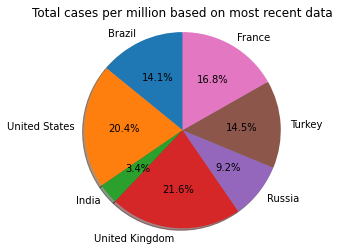

In [ ]:
#Pie chart showing total cases (Population adjusted)
fig1, ax1 = plt.subplots()
ax1.pie(Recent_df['total_cases_per_million'], labels=Recent_df['location'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total cases per million based on most recent data')
plt.show()

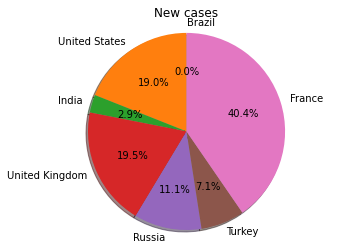

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(Recent_df['new_cases'], labels=Recent_df['location'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('New cases')
plt.show()

In [ ]:
USA=df.loc[df['iso_code'] == 'USA']

In [ ]:
USA.head(-5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131119,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
131120,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
131121,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
131122,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
131123,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,-8988.0,-3.62,-2.65,-26.997876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131797,USA,North America,United States,2021-11-30,48560466.0,117447.0,82347.857,780561.0,1445.0,869.857,145864.425,352.784,247.354,2344.625,4.340,2.613,1.28,13549.0,40.698,52653.0,158.157,NaN,NaN,NaN,NaN,1591207.0,668775583.0,2008.847,4.780,1080013.0,3.244,0.0762,13.1,tests performed,467007018.0,235139886.0,197052820.0,43795908.0,1758213.0,1015793.0,140.66,70.82,59.35,13.19,3060.0,260251.0,0.078,50.46,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
131798,USA,North America,United States,2021-12-01,48698971.0,138505.0,86176.000,7

In [ ]:
USA.count()

iso_code                                   688
continent                                  688
location                                   688
date                                       688
total_cases                                688
                                          ... 
human_development_index                    688
excess_mortality_cumulative_absolute        92
excess_mortality_cumulative                 92
excess_mortality                            92
excess_mortality_cumulative_per_million     92
Length: 67, dtype: int64

In [ ]:
print('There are',len(USA.columns), 'unique columns')
print(USA.columns)

There are 67 unique columns
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vacci

In [ ]:
USA.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [ ]:
percent_missing_ft = USA.isnull().sum(axis=0)/USA.shape[0]

percent_missing_ft=percent_missing_ft.sort_values(ascending=False)

percent_missing_ft.head(30)

handwashing_facilities                        1.000000
weekly_icu_admissions_per_million             1.000000
weekly_icu_admissions                         1.000000
weekly_hosp_admissions_per_million            0.895349
weekly_hosp_admissions                        0.895349
excess_mortality_cumulative_per_million       0.866279
excess_mortality                              0.866279
excess_mortality_cumulative_absolute          0.866279
excess_mortality_cumulative                   0.866279
total_boosters_per_hundred                    0.827035
total_boosters                                0.827035
new_vaccinations                              0.475291
new_vaccinations_smoothed_per_million         0.475291
new_people_vaccinated_smoothed                0.475291
new_people_vaccinated_smoothed_per_hundred    0.475291
new_vaccinations_smoothed                     0.475291
people_fully_vaccinated                       0.473837
people_fully_vaccinated_per_hundred           0.473837
people_vac

In [ ]:
Deadliest_Days=USA[['date','new_deaths']]
Deadliest_Days=Deadliest_Days.dropna()
Deadliest_Days.sort_values(by='new_deaths',ascending=False)

,date,new_deaths
131483,2021-01-20,4442.0
131475,2021-01-12,4389.0
131471,2021-01-08,4189.0
131484,2021-01-21,4137.0
131490,2021-01-27,4128.0
...,...,...
131160,2020-03-03,1.0
131166,2020-03-09,1.0
131162,2020-03-05,1.0
131157,2020-02-29,1.0


In [ ]:
Stringecy_Index=USA[['date','stringency_index']]
Stringecy_Index=Stringecy_Index.dropna()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f869ef27190>]],
      dtype=object)

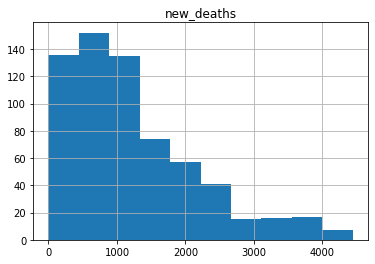

In [ ]:
Deadliest_Days.hist(column='new_deaths')

In [ ]:
USA=USA.drop(['handwashing_facilities','weekly_icu_admissions_per_million','weekly_icu_admissions'],axis=1)

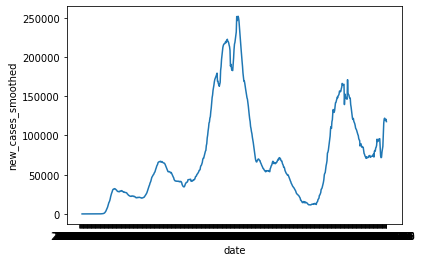

In [ ]:
#If anyone knows how to bin the dates at the bottom lmk
sns.lineplot(data=USA,x='date',y='new_cases_smoothed')

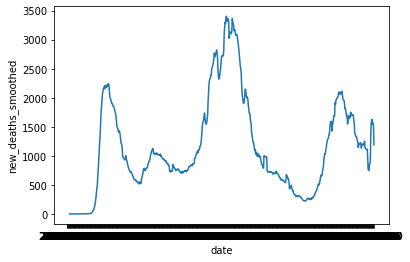

In [ ]:
sns.lineplot(data=USA,x='date',y='new_deaths_smoothed')

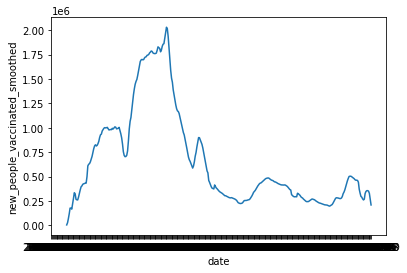

In [ ]:
sns.lineplot(data=USA,x='date',y='new_people_vaccinated_smoothed')

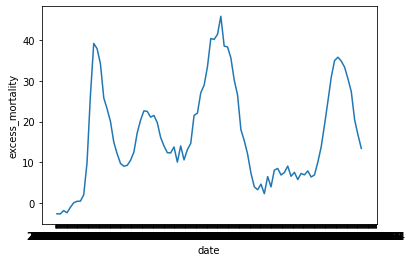

In [ ]:
sns.lineplot(data=USA,x='date',y='excess_mortality')

Text(0.5, 1.0, 'Non-Categorical Data Heatmap')

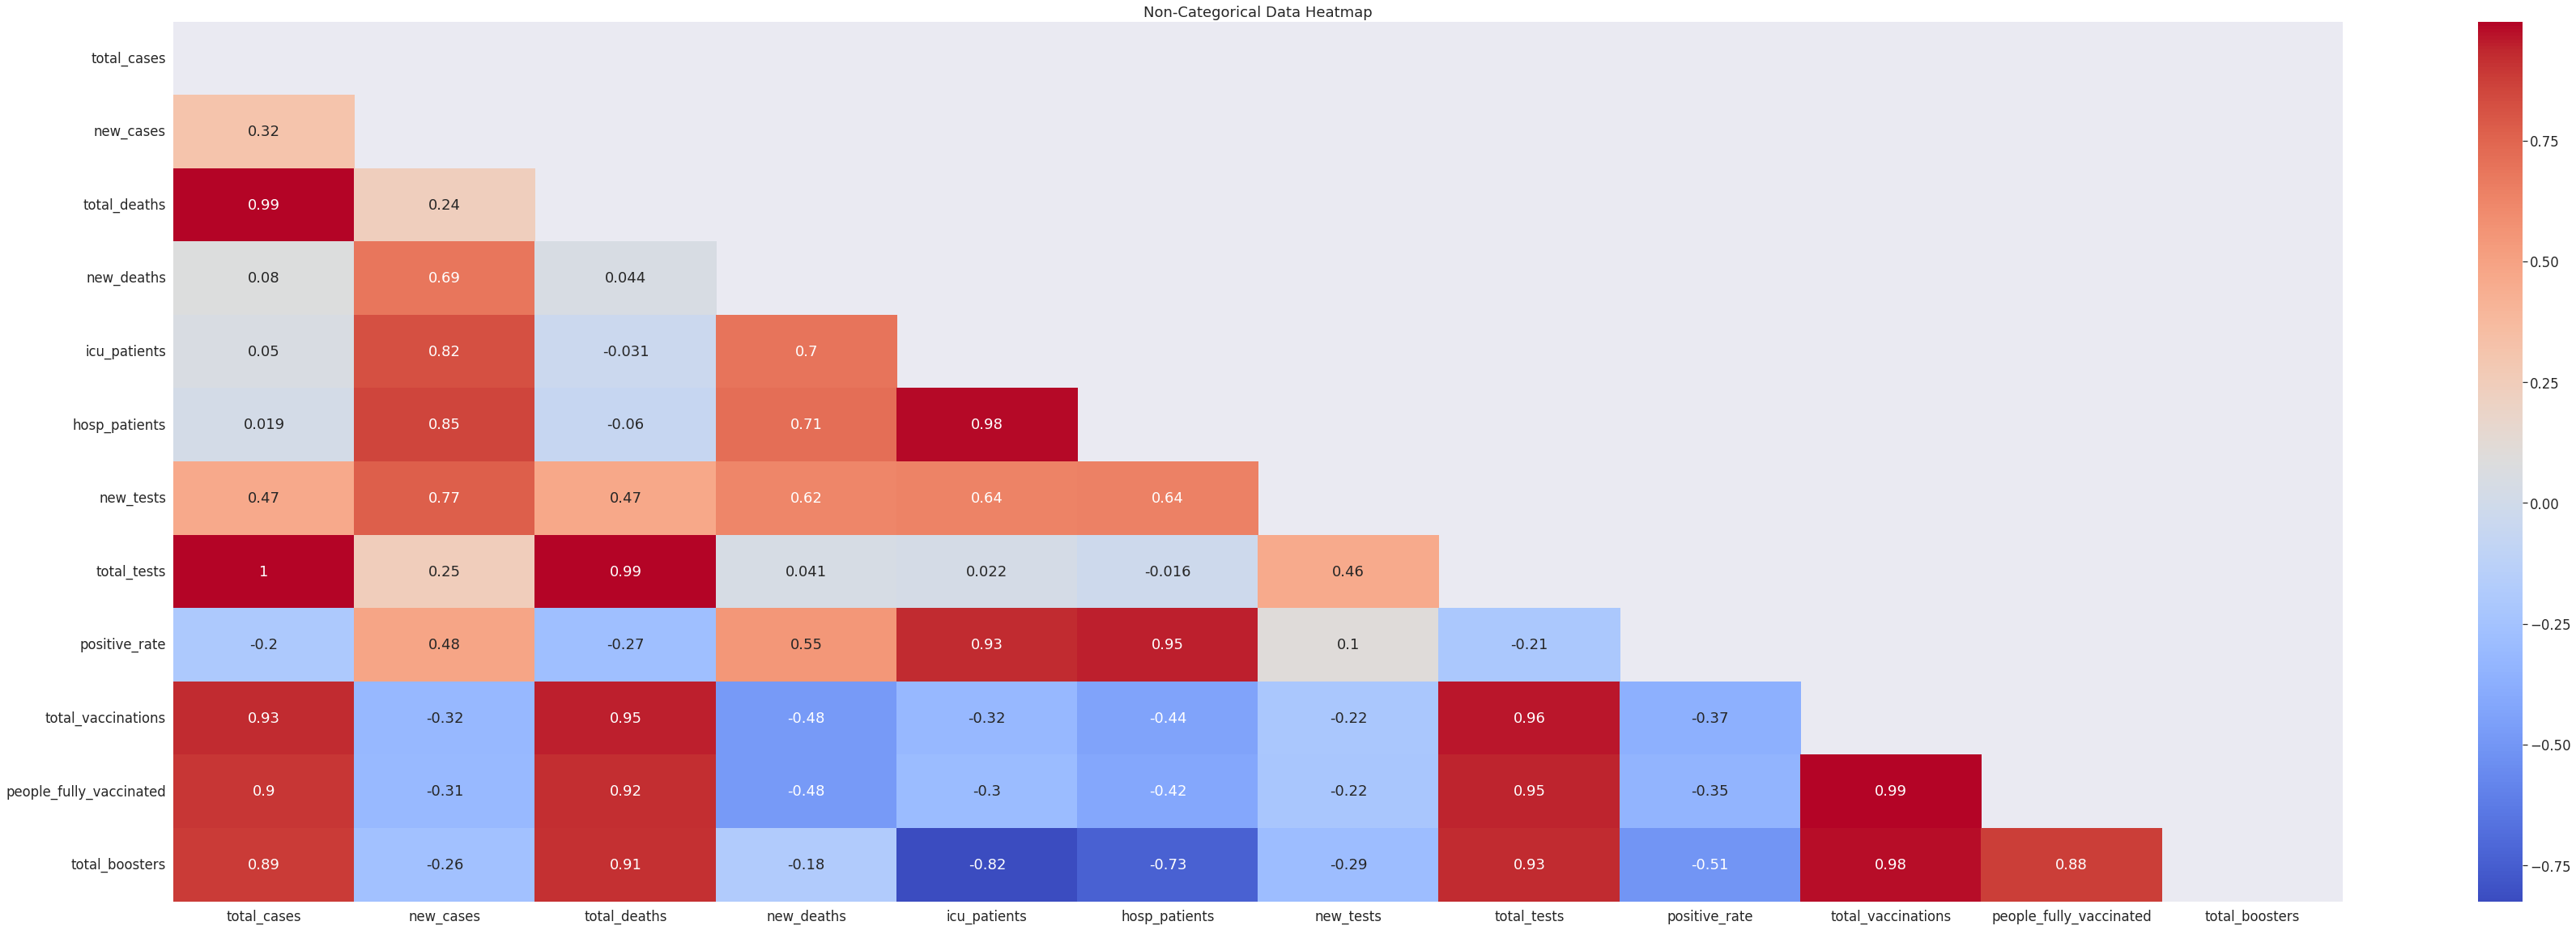

In [ ]:
correlation=USA[['total_cases','new_cases','total_deaths','new_deaths','icu_patients','hosp_patients','new_tests','total_tests','positive_rate','total_vaccinations','people_fully_vaccinated','total_boosters']]
corr=correlation.corr()
corr_round=corr.round(decimals=3)
matrix=np.triu(corr_round)
sns.set(rc = {'figure.figsize':(60,20)})
sns.set(font_scale=1.5)


heatmap=sns.heatmap(corr_round,annot=True,cmap='coolwarm',mask=matrix)
heatmap.set_title('Non-Categorical Data Heatmap')